# Will they stay in our bank or choose an other one? Deep Learning Approach

- Auther: Muhammad Tayyab Ali
- Github: https://github.com/TayyabAli92
- Kaggle: https://www.kaggle.com/tayyabli/code

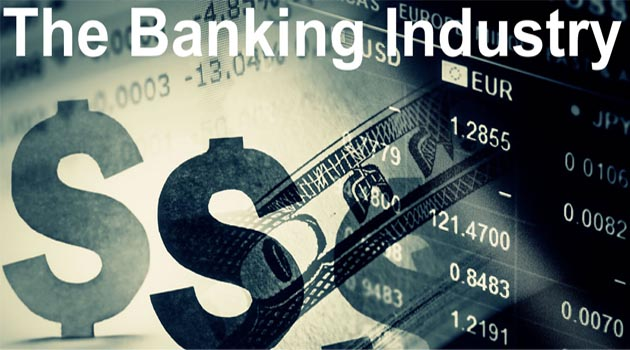

# AIM: `We will classifiy the customers who will stay in our bank or leave the bank using deep learning apporch.`

`Data Description`

- Customer ID: A unique identifier for each customer 
- Sunname: The curtomer's surname or last name 
- Credit Scor: A numerical value representing the customer's credit score
- Geography: The country where the customer resides
- Age: The customer's age.
- Tenure: The number of years the customer has beeen with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank product the customer uses (e.e., saving account, credit card)
- HasCrCard: Whether the customer has a credit card
- IsActivateMember: Wether the customer is an active member
- EstimatedSalary: The estimated salary of the customer
- Exited: Wether the customer has churned (Target Variable)

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# remove warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset 
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
# train dataset and exploration
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df = df_train.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
# find and plot null values
df.isnull().sum().sort_values(ascending=False).head(5)

id             0
CustomerId     0
Surname        0
CreditScore    0
Geography      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [8]:
df.columns 

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the values counts of the categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



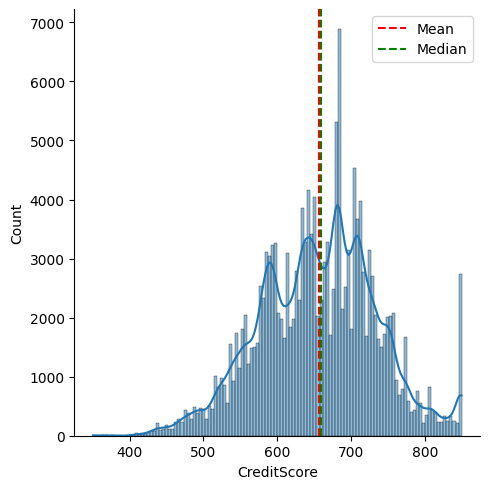

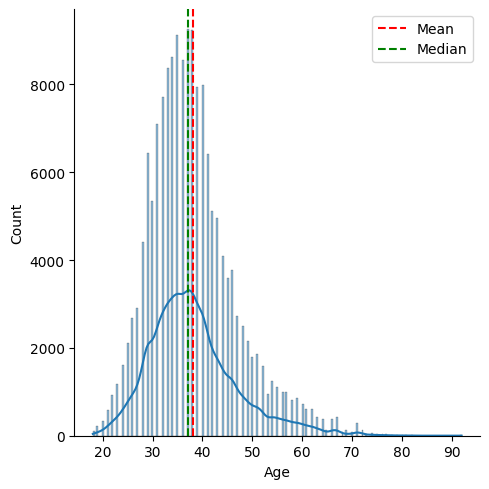

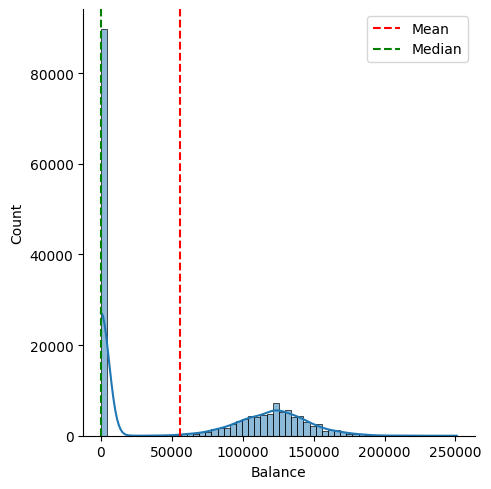

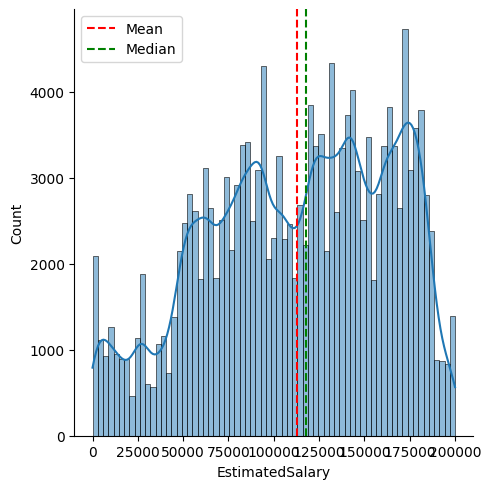

In [10]:
# create histogram of numerical columns using sns and kde=true
for col in num_cols:
    sns.displot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

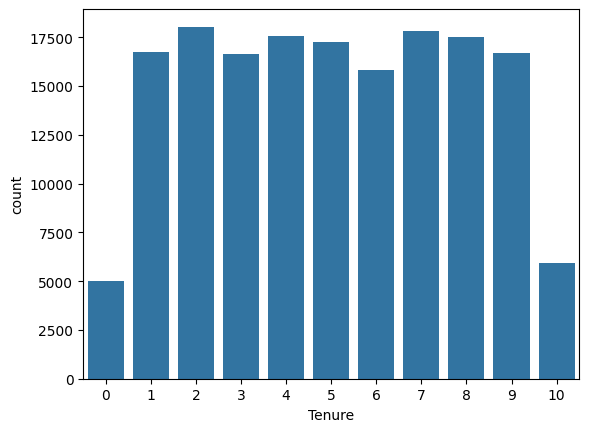

In [11]:
# create a count plot for Tenure column
sns.countplot(df, x='Tenure')

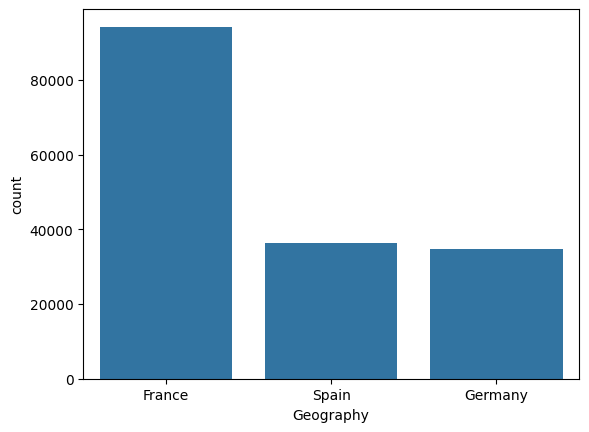

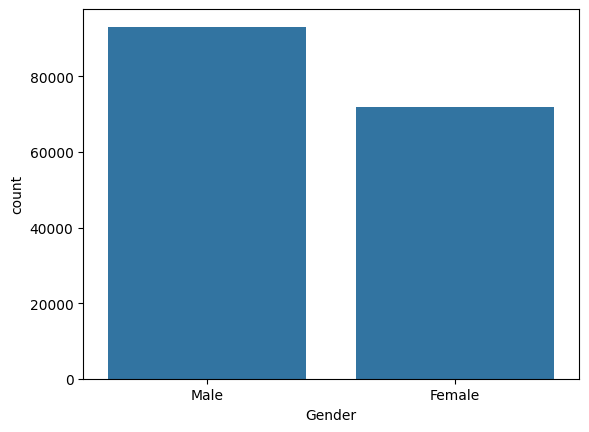

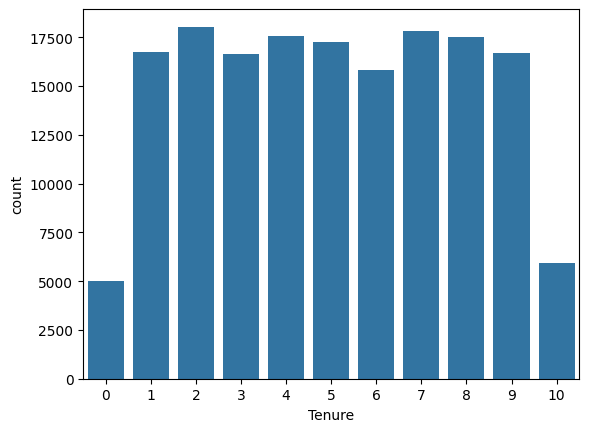

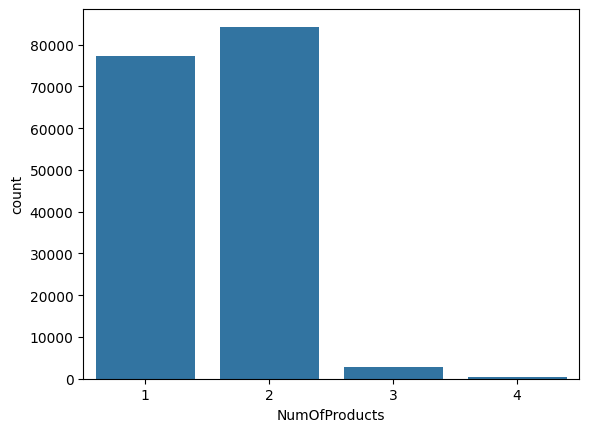

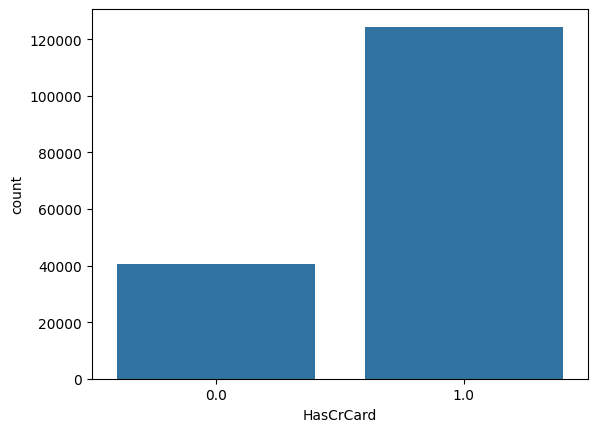

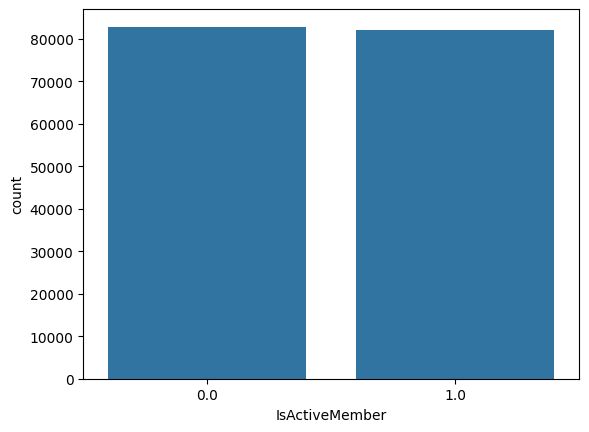

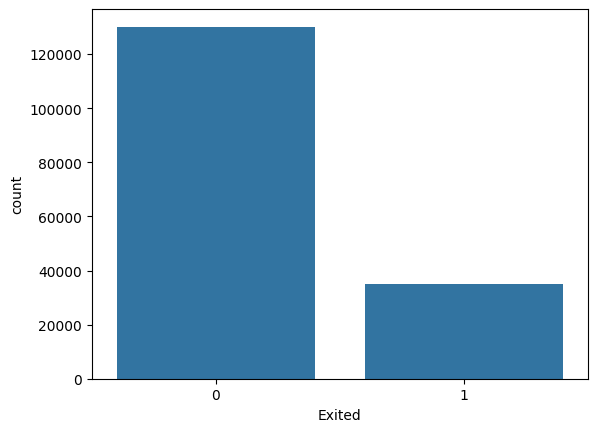

In [12]:
# create a count plot for each cat column
for col in cat_cols:
    sns.countplot(df, x = df[col])
    plt.show()

In [13]:
# print the number of rows and columns
print(f"The train dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The train dataset has 165034 rows and 14 columns


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])


In [15]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
# split the data into X and y 
X = df.drop(['Exited','id', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [18]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [19]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Architecture




Epoch 1/100


4126/4126 [==============================] - 17s 3ms/step - loss: 43.4941 - accuracy: 0.6721 - val_loss: 26.8787 - val_accuracy: 0.7890
Epoch 2/100
4126/4126 [==============================] - 14s 3ms/step - loss: 1.9895 - accuracy: 0.7197 - val_loss: 0.5113 - val_accuracy: 0.7893
Epoch 3/100
4126/4126 [==============================] - 14s 3ms/step - loss: 0.5167 - accuracy: 0.7876 - val_loss: 0.5149 - val_accuracy: 0.7893
Epoch 4/100
4126/4126 [==============================] - 14s 4ms/step - loss: 0.5165 - accuracy: 0.7882 - val_loss: 0.5150 - val_accuracy: 0.7893
Epoch 5/100
4126/4126 [==============================] - 13s 3ms/step - loss: 0.5164 - accuracy: 0.7882 - val_loss: 0.5149 - val_accuracy: 0.7893
Epoch 6/100
4126/4126 [==============================] - 13s 3ms/step - loss: 0.5164 - accuracy: 0.7882 - val_loss: 0.5149 - val_accuracy: 0.7893
Epoch 7/100
4126/4126 [==============================] - 13s 3ms/step - loss: 0.5164 - accuracy: 0.7882 - val_loss: 0

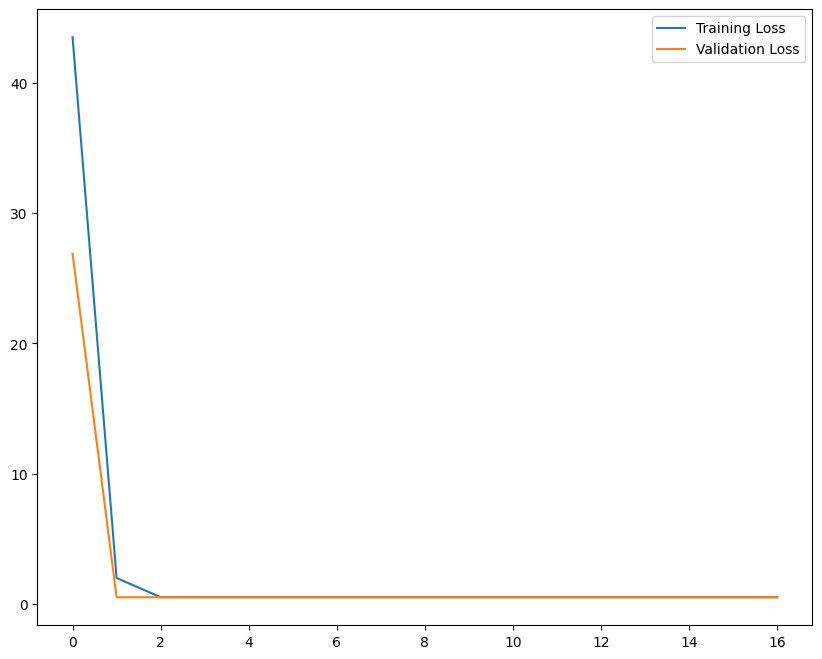

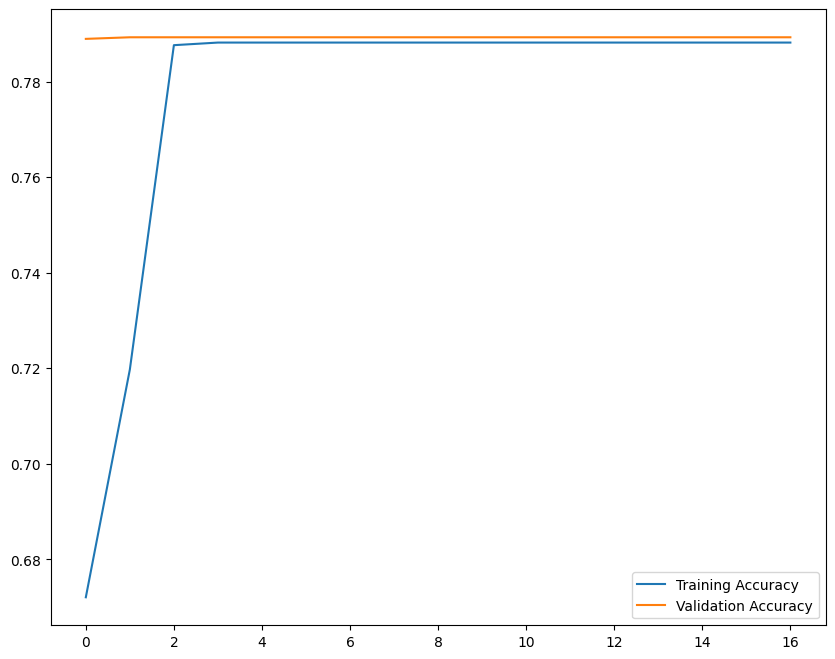

CPU times: total: 6min 16s
Wall time: 4min 24s


In [20]:
%%time
# remove warning
import warnings
warnings.filterwarnings('ignore')

# Create a deep neural network using tensorflow for binary classification
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input laye
                              
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    # tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 3 
    # tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 4

    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])


# Define the callback function
early_stopping = EarlyStopping(patience=15)

# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

# Train the model and plot the training and testing loss and accuracy at each epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8)) 
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training Accuracy')
ax.plot(history.history['val_accuracy'],label='Validation Accuracy')
ax.legend()
plt.show()

# XGB Classifier

Accuracy score:  0.8663313842518253
Precision score:  0.8663313842518253
Recall score:  0.8663313842518253
F1 score:  0.8663313842518253


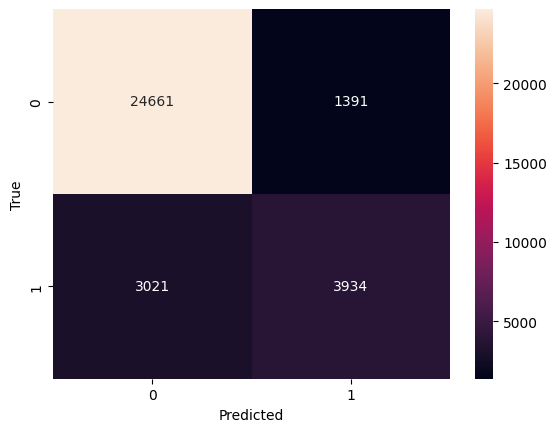

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# predict the test data and create a submission file of probability of each class
y_pred = xgb.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))
submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)